In [1]:
from large_gcs.contact.contact_location import *
from large_gcs.contact.contact_pair_mode import *
from large_gcs.contact.rigid_body import *
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_subopt import GcsAstarSubOpt
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_over,
)
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})

In [2]:
base_filename = "contact_graph_triangle_challenge_full"
base_filename = "cg_trichal2_full"
# base_filename = "cg_trichal3_full"
base_filename = "cg_maze_a1_full"

method_modifier = "gcs_astar_subopt_shortestedges_obj_weighted"
# file_name = "contact_graph_triangle_challenge_sol_only.npy"
graph_file = os.path.join(
    os.environ["PROJECT_ROOT"], "large_gcs", "example_graphs", base_filename + ".npy"
)

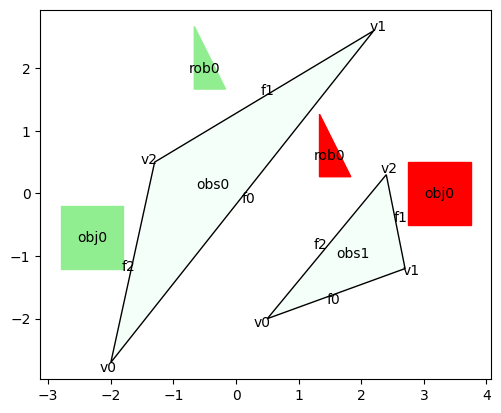

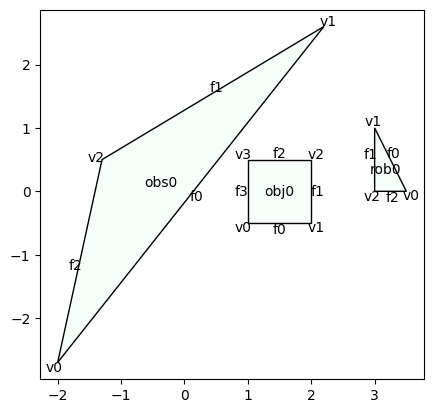

In [34]:
# obs_vertices = [[[-1, 2], [-1, -1], [2, 2]]]
# obj_vertices = [[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]]
# rob_vertices = [[[3, 1], [3, 0], [3.5, 0]]]

# # 3 items triangle challenge 2
# source_obj_pos = [[3.25, 0]]
# source_rob_pos = [[1.5, 0.5]]
# target_obj_pos = [[-1.5, 0]]
# target_rob_pos = [[-3, 0]]
# # 3 items triangle challenge 3
# source_obj_pos = [[3.25, 0]]
# source_rob_pos = [[-3, 0]]
# target_obj_pos = [[-1.5, 0]]
# target_rob_pos = [[1.5, 0.5]]

# maze_a1
obs_vertices = [
    [[-2, -2.7], [2.2, 2.6], [-1.3, 0.5]],
    [[0.5, -2], [2.7, -1.2], [2.4, 0.3]],
]
obj_vertices = [[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]]
rob_vertices = [[[3, 1], [3, 0], [3.5, 0]]]
source_obj_pos = [[3.25, 0]]
source_rob_pos = [[1.5, 0.6]]
target_obj_pos = [[-2.3, -0.7]]
target_rob_pos = [[-0.5, 2]]

obs = []
objs = []
robs = []
n_pos_per_set = 2
for i in range(len(obs_vertices)):
    obs.append(
        RigidBody(
            name=f"obs{i}",
            geometry=Polyhedron.from_vertices(obs_vertices[i]),
            mobility_type=MobilityType.STATIC,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(obj_vertices)):
    objs.append(
        RigidBody(
            name=f"obj{i}",
            geometry=Polyhedron.from_vertices(obj_vertices[i]),
            mobility_type=MobilityType.UNACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
for i in range(len(rob_vertices)):
    robs.append(
        RigidBody(
            name=f"rob{i}",
            geometry=Polyhedron.from_vertices(rob_vertices[i]),
            mobility_type=MobilityType.ACTUATED,
            n_pos_points=n_pos_per_set,
        )
    )
all_rigid_bodies = obs + objs + robs

# for rigid_body in all_rigid_bodies:
#     rigid_body.plot()
for static_body in obs:
    static_body.plot()
for movable_body, source_pos in zip(objs + robs, source_obj_pos + source_rob_pos):
    movable_body.plot_at_position(source_pos, color="red")
for movable_body, target_pos in zip(objs + robs, target_obj_pos + target_rob_pos):
    movable_body.plot_at_position(target_pos, color="lightgreen")
plt.gca().set_aspect("equal")
plt.show()
robs[0].plot()
obs[0].plot()
objs[0].plot()
plt.show()

In [4]:
# ws_x = 4
# ws_y = 3
# vertex_inclusion = [
#     "source",
#     "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')",
#     "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
#     "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
#     "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
#     "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
#     "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')",
#     "('IC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')",
#     "target",
# ]
# contact_graph = ContactGraph(
#     obs,
#     objs,
#     robs,
#     source_obj_pos,
#     source_rob_pos,
#     target_obj_pos,
#     target_rob_pos,
#     workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
#     vertex_exclusion=None,
#     vertex_inclusion=None,
# )

# print(contact_graph.params)
# # Serialize and save to disk
# contact_graph.save_to_file(graph_file)

In [5]:
cg = ContactGraph.load_from_file(graph_file)
print(cg.params)

Generating contact sets for 3 bodies...
Generating contact pair modes for 3 body pairs...


100%|██████████| 3/3 [00:00<00:00, 70.97it/s]


Each body pair has on average 6.666666666666667 modes
Generating contact sets for 216 sets...


100%|██████████| 216/216 [00:02<00:00, 82.94it/s]


Pruning empty sets...


100%|██████████| 216/216 [00:01<00:00, 129.99it/s]


179 sets remain after removing 37 empty sets
Adding 181 vertices to graph...


100%|██████████| 181/181 [00:00<00:00, 6571.58it/s]


Adding 6408 edges to graph...


100%|██████████| 6408/6408 [00:01<00:00, 3970.92it/s]

GraphParams(dim_bounds=(4, 18), n_vertices=181, n_edges=6408, source=[[3.25, 0], [1.5, 0.5]], target=[[-1.5, 0], [-3, 0]], workspace=[[-4, 4], [-3, 3]], default_costs_constraints=None)


In [6]:
# for edge in cg.outgoing_edges("('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"):
#     print(edge.v)

In [7]:
# gcs_astar = GcsAstar(cg, use_convex_relaxation=False,
#                      shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over)
# sol = gcs_astar.run(verbose=True, animate=False)

In [8]:
gcs_astar_subopt = GcsAstarSubOpt(
    cg,
    use_convex_relaxation=False,
    shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over,
)
sol = gcs_astar_subopt.run(verbose=True, animate=False)


AlgMetrics(n_vertices_visited=2, n_edges_visited=0, n_edges_explored=0, vertex_coverage=0.01, edge_coverage=0.0, time_wall_clock=0.0, n_gcs_solves=0, gcs_solve_time_total=0.0, gcs_solve_time_iter_mean=0.0, gcs_solve_time_iter_std=0.0, gcs_solve_time_iter_min=inf, gcs_solve_time_iter_max=0.0, n_vertex_revisits=0, n_edges_reexplored=0)
now exploring node source's 1 neighbors (0)
Current vertices: ['target', 'source']
edge source -> ('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0') is feasible, new dist: 37.98623821376504, added to pq True

AlgMetrics(n_vertices_visited=3, n_edges_visited=1, n_edges_explored=1, vertex_coverage=0.02, edge_coverage=0.0, time_wall_clock=0.01631307601928711, n_gcs_solves=1, gcs_solve_time_total=0.002501964569091797, gcs_solve_time_iter_mean=0.002501964569091797, gcs_solve_time_iter_std=0.0, gcs_solve_time_iter_min=0.002501964569091797, gcs_solve_time_iter_max=0.002501964569091797, n_vertex_revisits=0, n_edges_reexplored=0)
now exploring node

In [9]:
output_dir = os.path.join(os.environ["PROJECT_ROOT"], "output", "contact")
vid_file = os.path.join(output_dir, f"{method_modifier}_{base_filename}.mp4")
graphviz_file = os.path.join(output_dir, f"{method_modifier}_{base_filename}")

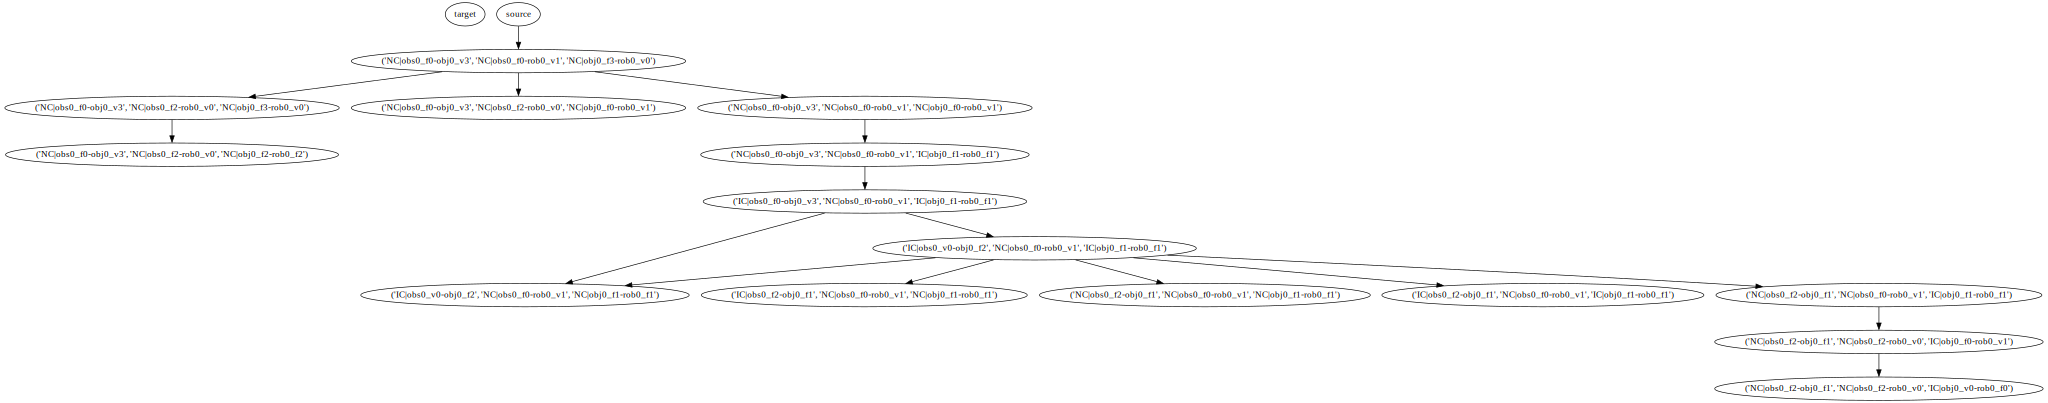

In [10]:
gviz = gcs_astar_subopt._visited.graphviz()
gviz

In [11]:
gviz.render(graphviz_file, view=False)

'/Users/chewchiashaoyuan/Documents/Software/large_gcs/output/contact/gcs_astar_subopt_shortestedges_cg_trichal2_full.pdf'

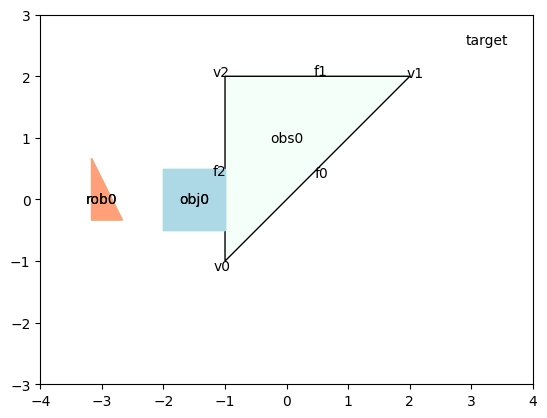

In [12]:
cg._post_solve(sol)
anim = cg.animate_solution()
HTML(anim.to_html5_video())

In [13]:
anim.save(vid_file)